In [1]:
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import xarray as xr

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [2]:
ds_CM4 = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251.nc")
ds_CM4_JJA = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251_JJA.nc")
ds_CM4_DJF = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251_DJF.nc")

ds_ESM4 = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ESM4.nc")
ds_ESM4_JJA = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ESM4_JJA.nc")
ds_ESM4_DJF = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ESM4_DJF.nc")

ds_era = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5.nc")
ds_era_JJA = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5_JJA.nc")
ds_era_DJF = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5_DJF.nc")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


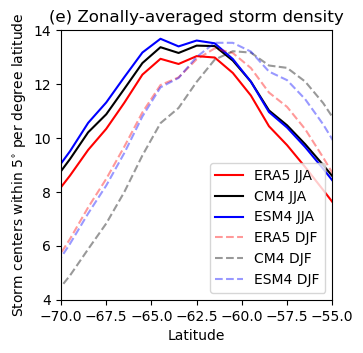

In [40]:
#ds_CM4.hist_5deg.sum('lon').plot(color='k', label=)
#ds_ESM4.hist_5deg.sum('lon').plot(color="grey")
plt.figure(figsize=(3.5,3.5))

ds_era_JJA.hist_5deg.mean('lon').plot(color='red', label="ERA5 JJA")
ds_CM4_JJA.hist_5deg.mean('lon').plot(color='black', label="CM4 JJA")
ds_ESM4_JJA.hist_5deg.mean('lon').plot(color='blue', label="ESM4 JJA")

ds_era_DJF.hist_5deg.mean('lon').plot(linestyle='dashed', color='red', alpha=0.4, label="ERA5 DJF")
ds_CM4_DJF.hist_5deg.mean('lon').plot(linestyle='dashed', color='black', alpha=0.4, label="CM4 DJF")
ds_ESM4_DJF.hist_5deg.mean('lon').plot(linestyle='dashed', color='blue', alpha=0.4, label="ESM4 DJF")

plt.legend(loc="lower right")
plt.xlim([-70, -55])
plt.title('(e) Zonally-averaged storm density')
plt.ylabel('Storm centers within 5$^{\circ}$ per degree latitude')
plt.xlabel('Latitude')
plt.ylim([4, 14])
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/storm_density/CM4_ESM4_latitude.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


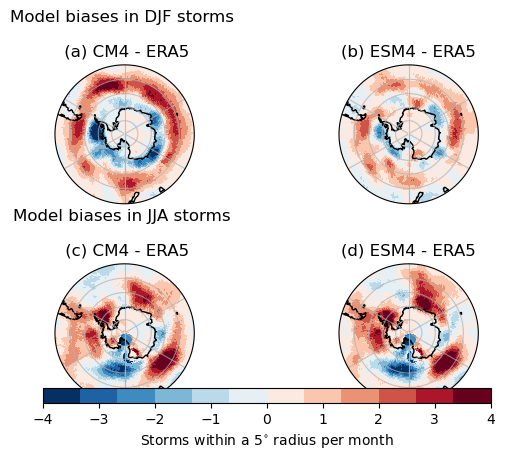

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=2, #figsize=(8.5, 11),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})

axs=axs.flatten()

(ds_CM4_DJF.hist_5deg - ds_era_DJF.hist_5deg).plot(ax=axs[0],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -4, vmax=4, extend="neither")
axs[0].set_title("Model biases in DJF storms \n \n (a) CM4 - ERA5")

im = (ds_ESM4_DJF.hist_5deg - ds_era_DJF.hist_5deg).plot(ax=axs[1],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -4, vmax=4, extend="neither")
axs[1].set_title("(b) ESM4 - ERA5")

(ds_CM4_JJA.hist_5deg - ds_era_JJA.hist_5deg).plot(ax=axs[2],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -4, vmax=4, extend="neither")
axs[2].set_title("Model biases in JJA storms \n \n (c) CM4 - ERA5")

im = (ds_ESM4_JJA.hist_5deg - ds_era_JJA.hist_5deg).plot(ax=axs[3],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -4, vmax=4, extend="neither")
axs[3].set_title("(d) ESM4 - ERA5")


for i in range(4):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='Storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(-4,5,1))

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_ESM4_stormtracksbias.png", format="png", dpi=100, bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/storm_density/CM4_ESM4_stormtracksbias.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


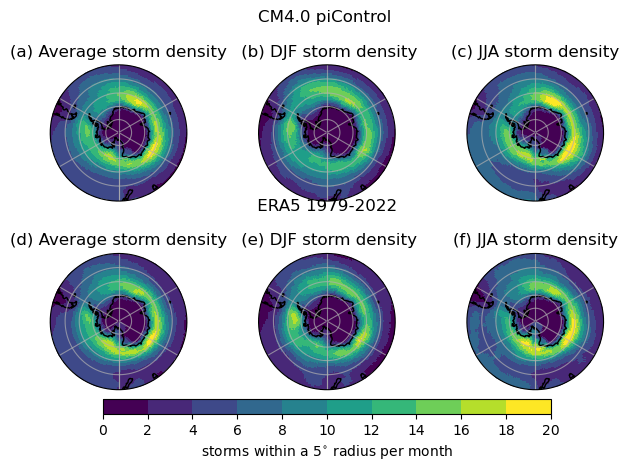

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

ds_251.hist_5deg.plot(ax=axs[0], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':'storms (5$^{\circ}$ radius)$^{-1}$ month$^{-1}$'},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[0].set_title("(a) Average storm density")
ds_251_DJF.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("CM4.0 piControl \n \n (b) DJF storm density")
ds_251_JJA.hist_5deg.plot(ax=axs[2], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[2].set_title("(c) JJA storm density")

###################### ERA5 HISTOGRAMS ##############################

ds_era.hist_5deg.plot(ax=axs[3], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[3].set_title("(d) Average storm density")
ds_era_DJF.hist_5deg.plot(ax=axs[4], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[4].set_title("\n ERA5 1979-2022 \n \n (e) DJF storm density")
im = ds_era_JJA.hist_5deg.plot(ax=axs[5], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[5].set_title("(f) JJA storm density")


plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(0,22,2))

for i in np.arange(6):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_stormtracks_TE.png", format="png", dpi=100, bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/CM4_stormtracks_TE.eps", format="eps")

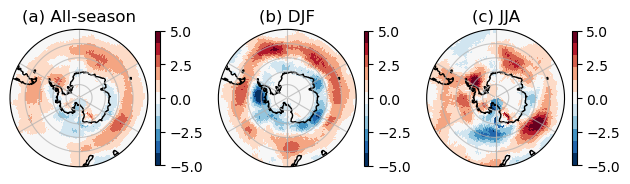

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

(ds_251.hist_5deg - ds_era.hist_5deg).plot(ax=axs[0], transform=ccrs.PlateCarree(),
                                    cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('RdBu_r', 11),
                                    vmin = -5, vmax=5, extend="neither")
axs[0].set_title("(a) All-season")
(ds_251_DJF.hist_5deg - ds_era_DJF.hist_5deg).plot(ax=axs[1], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('RdBu_r', 11),
                                    vmin = -5, vmax=5, extend="neither")
axs[1].set_title("(b) DJF")
(ds_251_JJA.hist_5deg - ds_era_JJA.hist_5deg).plot(ax=axs[2], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('RdBu_r', 11),
                                    vmin = -5, vmax=5, extend="neither")
axs[2].set_title("(c) JJA")


for i in np.arange(3):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_stormtrack_bias.png", format="png", dpi=100, bbox_inches="tight")

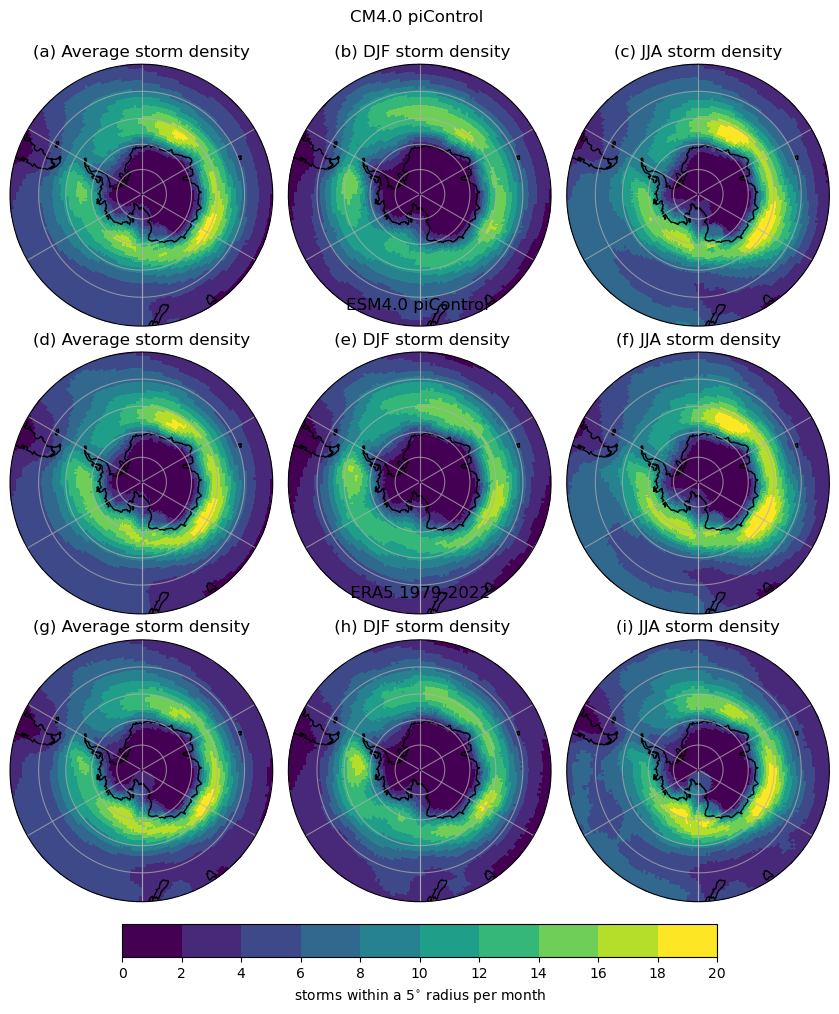

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 11),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

ds_CM4.hist_5deg.plot(ax=axs[0], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':'storms (5$^{\circ}$ radius)$^{-1}$ month$^{-1}$'},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[0].set_title("(a) Average storm density")
ds_CM4_DJF.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("CM4.0 piControl \n \n (b) DJF storm density")
ds_CM4_JJA.hist_5deg.plot(ax=axs[2], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[2].set_title("(c) JJA storm density")

###################### ESM4 HISTOGRAMS ##############################
ds_ESM4.hist_5deg.plot(ax=axs[3], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':'storms (5$^{\circ}$ radius)$^{-1}$ month$^{-1}$'},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[3].set_title("(d) Average storm density")
ds_ESM4_DJF.hist_5deg.plot(ax=axs[4], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[4].set_title("ESM4.0 piControl \n \n (e) DJF storm density")
ds_ESM4_JJA.hist_5deg.plot(ax=axs[5], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[5].set_title("(f) JJA storm density")

###################### ERA5 HISTOGRAMS ##############################

ds_era.hist_5deg.plot(ax=axs[6], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[6].set_title("(g) Average storm density")
ds_era_DJF.hist_5deg.plot(ax=axs[7], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[7].set_title("\n ERA5 1979-2022 \n \n (h) DJF storm density")
im = ds_era_JJA.hist_5deg.plot(ax=axs[8], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[8].set_title("(i) JJA storm density")


plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(0,22,2))

for i in np.arange(9):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()


#plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_ESM4_stormtracks_TE.png", format="png", dpi=100, bbox_inches="tight")
#plt.savefig("/home/Katherine.Turner/CM4_ESM4_stormtracks_TE.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


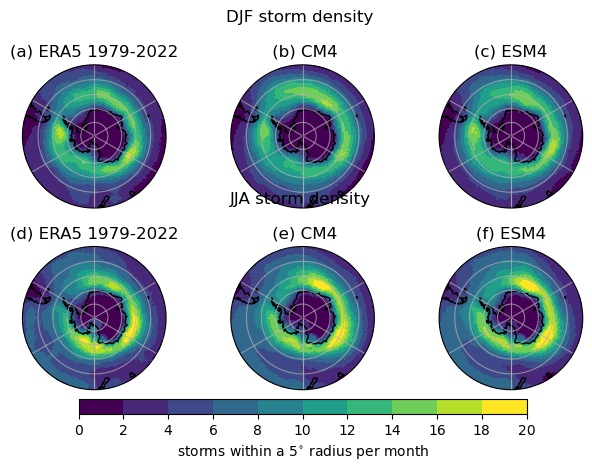

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3,# figsize=(8.5, 11),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

ds_era_DJF.hist_5deg.plot(ax=axs[0], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[0].set_title("(a) ERA5 1979-2022")

ds_CM4_DJF.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("DJF storm density \n \n (b) CM4")

ds_ESM4_DJF.hist_5deg.plot(ax=axs[2], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[2].set_title("(c) ESM4")

### JJA histograms
im = ds_era_JJA.hist_5deg.plot(ax=axs[3], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[3].set_title("(d) ERA5 1979-2022")

ds_CM4_JJA.hist_5deg.plot(ax=axs[4], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[4].set_title("JJA storm density \n \n (e) CM4")

ds_ESM4_JJA.hist_5deg.plot(ax=axs[5], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[5].set_title("(f) ESM4")

plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(0,22,2))

for i in np.arange(6):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()


plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_ESM4_stormtracks_TE.png", format="png", dpi=100, bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/CM4_ESM4_stormtracks_TE.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


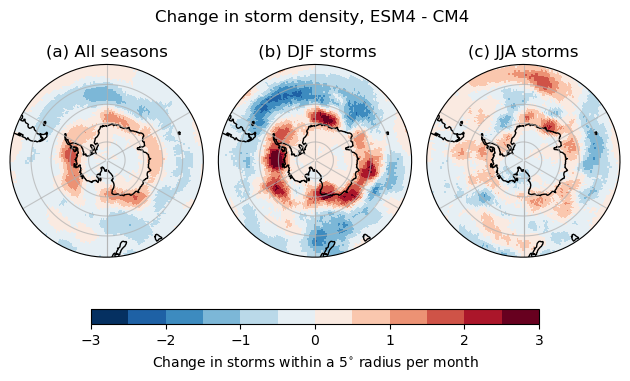

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, #figsize=(8.5, 11),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
(ds_ESM4.hist_5deg - ds_CM4.hist_5deg).plot(ax=axs[0],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -3, vmax=3, extend="neither")
axs[0].set_title("(a) All seasons")

(ds_ESM4_DJF.hist_5deg - ds_CM4_DJF.hist_5deg).plot(ax=axs[1],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -3, vmax=3, extend="neither")
axs[1].set_title("Change in storm density, ESM4 - CM4 \n \n (b) DJF storms")

im = (ds_ESM4_JJA.hist_5deg - ds_CM4_JJA.hist_5deg).plot(ax=axs[2],
                                           transform=ccrs.PlateCarree(),add_colorbar=False,
                                    cmap=plt.get_cmap('RdBu_r', 12),#),
                                    vmin = -3, vmax=3, extend="neither")
axs[2].set_title("(c) JJA storms")


for i in range(3):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.01)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='Change in storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(-3,4,1))

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_ESM4_stormtracksdiff_TE.png", format="png", dpi=100, bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/storm_density/CM4_ESM4_stormtracksdiff_TE.eps", format="eps")

In [ ]:
ds_CM4_DJF.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("CM4.0 piControl \n \n (b) DJF storm density")
ds_CM4_JJA.hist_5deg.plot(ax=axs[2], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[2].set_title("(c) JJA storm density")

###################### ESM4 HISTOGRAMS ##############################
ds_ESM4.hist_5deg.plot(ax=axs[3], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':'storms (5$^{\circ}$ radius)$^{-1}$ month$^{-1}$'},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[3].set_title("(a) Average storm density")

###################### ERA5 HISTOGRAMS ##############################

ds_era.hist_5deg.plot(ax=axs[6], transform=ccrs.PlateCarree(),add_colorbar=False,
                                    #cbar_kwargs = {'fraction': 0.03,
                                    #                'aspect': 30,
                                    #                'shrink': 0.7,
                                    #                'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[6].set_title("(d) Average storm density")
ds_era_DJF.hist_5deg.plot(ax=axs[7], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[7].set_title("\n ERA5 1979-2022 \n \n (e) DJF storm density")
im = ds_era_JJA.hist_5deg.plot(ax=axs[8], transform=ccrs.PlateCarree(),add_colorbar=False,
                                     #cbar_kwargs = {'fraction': 0.03,
                                     #               'aspect': 30,
                                     #               'shrink': 0.7,
                                     #               'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[8].set_title("(f) JJA storm density")


plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='storms within a 5$^{\circ}$ radius per month',
            ticks=np.arange(0,22,2))

for i in np.arange(9):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    

#plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_ESM4_stormtracks_TE.png", format="png", dpi=100, bbox_inches="tight")
#plt.savefig("/home/Katherine.Turner/CM4_ESM4_stormtracks_TE.eps", format="eps")

In [3]:
ds_209 = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-209.nc")
ds_230 = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-230.nc")

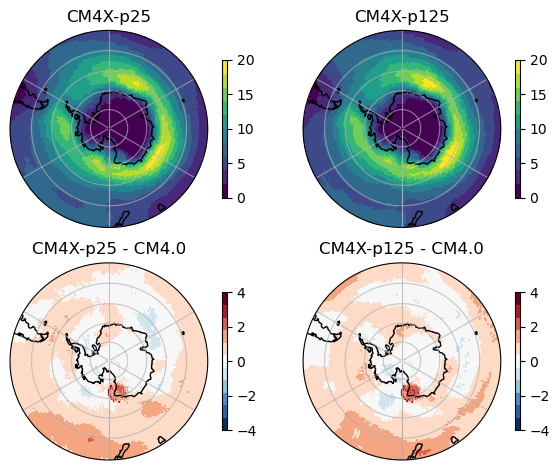

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

ds_230.hist_5deg.plot(ax=axs[0], transform=ccrs.PlateCarree(),
                                    cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[0].set_title("CM4X-p25")
ds_209.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("CM4X-p125")
(ds_230.hist_5deg - ds_251.hist_5deg).plot(ax=axs[2], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('RdBu_r', 11),
                                    vmin = -4, vmax=4, extend="neither")
axs[2].set_title("CM4X-p25 - CM4.0")
(ds_209.hist_5deg - ds_251.hist_5deg).plot(ax=axs[3], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('RdBu_r', 11),
                                    vmin = -4, vmax=4, extend="neither")
axs[3].set_title("CM4X-p125 - CM4.0")

for i in np.arange(4):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4X_stormtracks.png", format="png", dpi=100, bbox_inches="tight")